## **1. 라이브러리, 데이터 불러오기**

DATA DICTONARY:------>>>

1 Age: Age of the patient [years]

2 Sex: Sex of the patient [M: Male, F: Female]

3 ChestPainType: [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

4 RestingBP: Resting blood pressure [mm Hg]

5 Cholesterol: Serum cholesterol [mm/dl]

6 FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7 RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

8 MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202] 9 ExerciseAngina: Exercise-induced angina [Y: Yes, N: No]

10 Oldpeak: ST [Numeric value measured in depression]

11 ST_Slope: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12 HeartDisease: Output class [1: heart disease, 0: Normal]

In [1]:
#기본 라이브러리
import numpy as np
import pandas as pd
import os
import time

#시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)


#그래프 스타일 서식 지정
plt.style.use('default')
#그래프 한글 폰트
from matplotlib import font_manager, rc
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)

#사이킷런
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, RocCurveDisplay
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/data/')

Mounted at /content/gdrive/


In [3]:
heart_df = pd.read_csv('heart.csv')
heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


## **2. EDA**

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### **2-1. 불균형 데이터 파악**

In [6]:
heart_df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

### **2-2. 시각화**

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


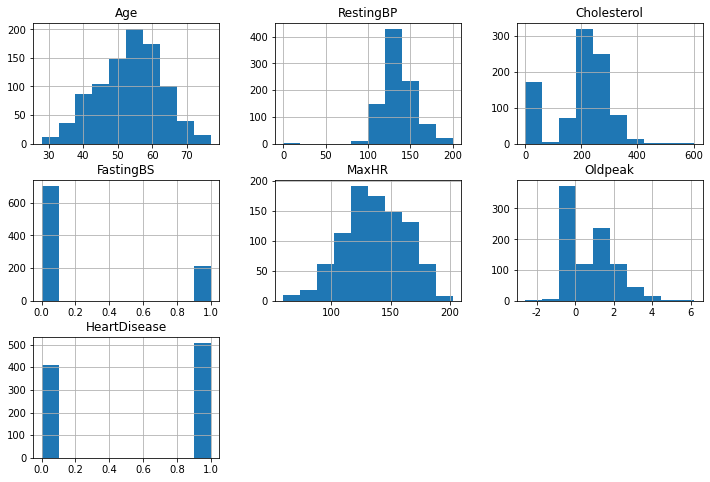

In [7]:
heart_df.hist(figsize = (12,8))
plt.show()

In [8]:
fig = px.histogram(heart_df, 'MaxHR', color="HeartDisease", histfunc="count")
fig.show()

In [9]:
numeric_col = [col for col in heart_df if heart_df[col].dtype != "object" ]
object_col = [col for col in heart_df if heart_df[col].dtype == "object" ]

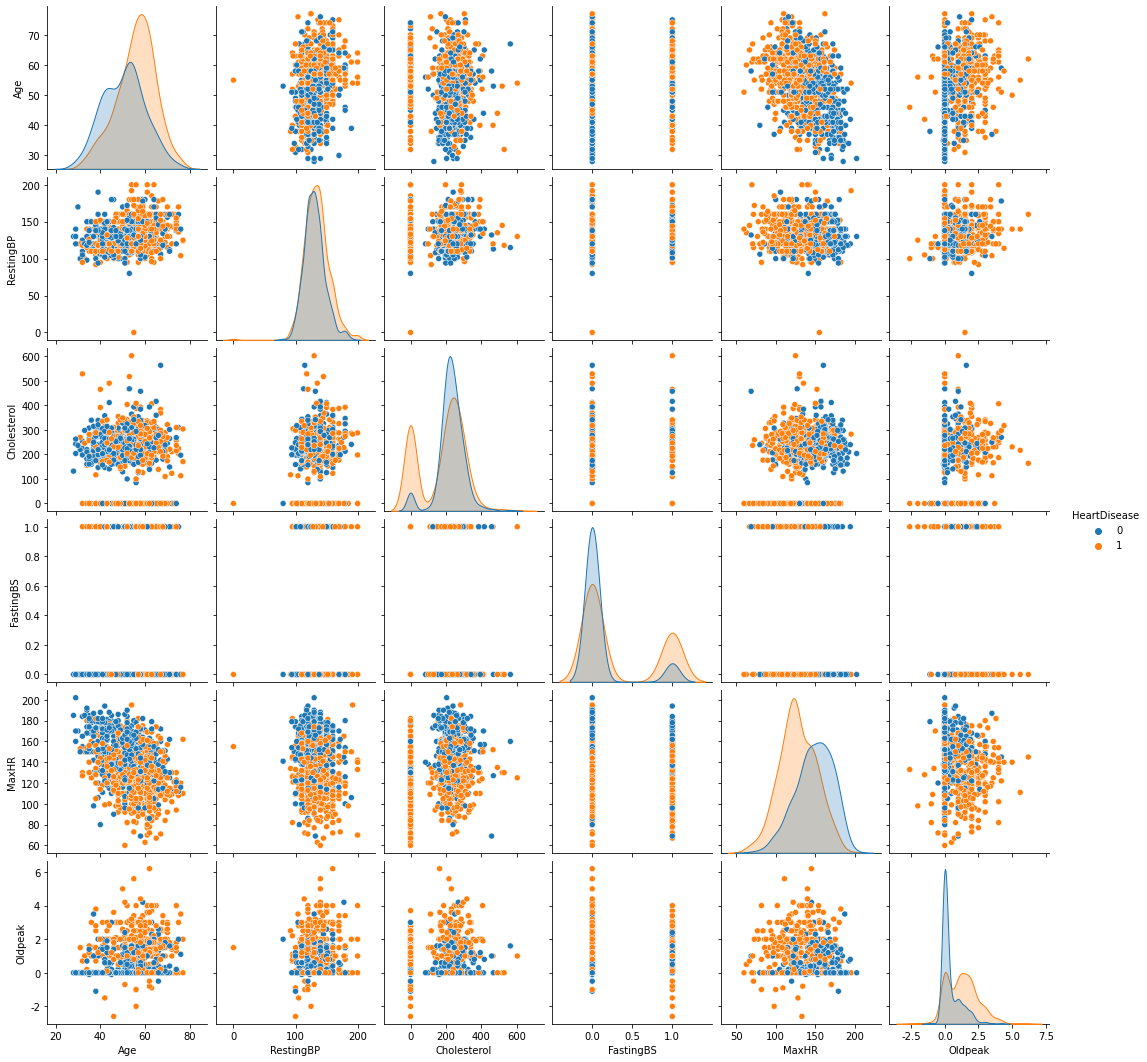

In [10]:
sns.pairplot(heart_df, hue = "HeartDisease")
plt.show()

In [11]:
for obj in object_col:
    fig = px.histogram(heart_df, obj, color = "HeartDisease", histfunc = "count", width=512, height=250)
    
    fig.show()

In [12]:
numeric_col

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

## **3. 이상치 제거**

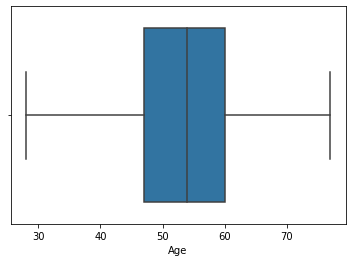

In [13]:
sns.boxplot(heart_df["Age"])

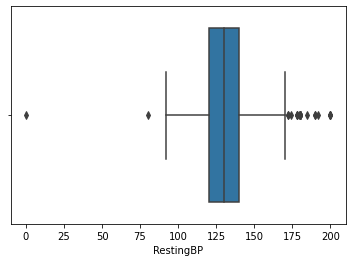

In [14]:
sns.boxplot(heart_df["RestingBP"])

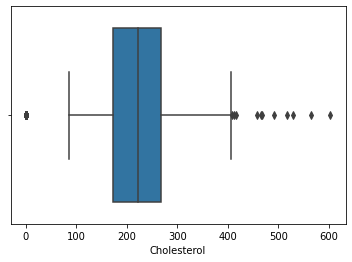

In [15]:
sns.boxplot(heart_df["Cholesterol"])

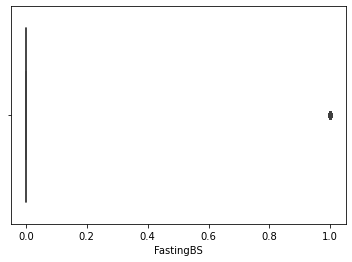

In [16]:
sns.boxplot(heart_df["FastingBS"])

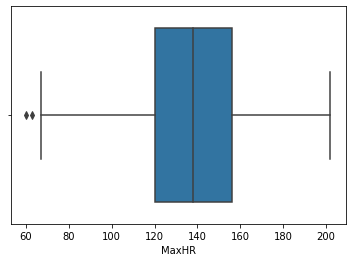

In [17]:
sns.boxplot(heart_df["MaxHR"])

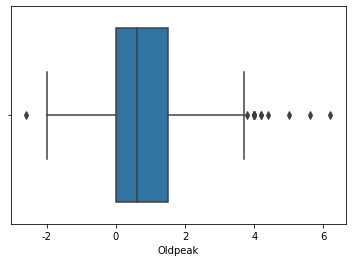

In [18]:
sns.boxplot(heart_df["Oldpeak"])

In [20]:
def get_outlier(data, col_name):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    q1, q3 = np.percentile(data[col_name], [25, 75])
    iqr = q3-q1
    lowest_val = q1 - iqr*1.5
    highest_val = q3 + iqr*1.5

    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = data[col_name][(data[col_name] < lowest_val) | (data[col_name] > highest_val)].index
    print(len(outlier_index))
    data.drop(outlier_index, axis=0, inplace=True)
    print(data.shape)

    return outlier_index
print(heart_df.shape)

outlier_col = ["RestingBP", "Cholesterol", "Oldpeak"]

for out in outlier_col:
    outlier_index = get_outlier(heart_df,out)
    heart_df.drop(outlier_index, axis=0, inplace = True)

(890, 12)
0
(890, 12)
177
(713, 12)


KeyError: ignored

In [21]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             713 non-null    int64  
 1   Sex             713 non-null    object 
 2   ChestPainType   713 non-null    object 
 3   RestingBP       713 non-null    int64  
 4   Cholesterol     713 non-null    int64  
 5   FastingBS       713 non-null    int64  
 6   RestingECG      713 non-null    object 
 7   MaxHR           713 non-null    int64  
 8   ExerciseAngina  713 non-null    object 
 9   Oldpeak         713 non-null    float64
 10  ST_Slope        713 non-null    object 
 11  HeartDisease    713 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 92.4+ KB


## **4. 데이터 분포 확인**

In [22]:
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import shapiro

for col in heart_df[numeric_col]:
    print(col, 
          '/ Skewness :',skew(heart_df[col]), 
          '/ Kurtosis :', kurtosis(heart_df[col], fisher = True),
          '/ shapiro :', shapiro(heart_df[col])[1])

#왜도(Skewness) : 정규분포 0, 왼쪽으로 치우침 왜도>0, 오른쪽으로 치우침 왜도<0
#첨도(Kurtosis) : Fisher(정규분포 0), Pearson(정규분포 3), 위로 뾰족함 첨도> x, 아래로 뾰족함 첨도 < x 
#정규분포(Shapiro) : 0.05보다 클 때 정규분포 만족



Age / Skewness : -0.07982879531558308 / Kurtosis : -0.4050800436115338 / shapiro : 0.005505818407982588
RestingBP / Skewness : 0.19255808206559705 / Kurtosis : -0.26527238880445125 / shapiro : 7.031556492620439e-08
Cholesterol / Skewness : 0.2304499946519257 / Kurtosis : 0.15237899540766797 / shapiro : 0.007353323977440596
FastingBS / Skewness : 1.8418218405447617 / Kurtosis : 1.3923076923076936 / shapiro : 3.241203347983302e-42
MaxHR / Skewness : -0.14505280229629364 / Kurtosis : -0.6441208379889121 / shapiro : 4.7693916712887585e-05
Oldpeak / Skewness : 1.215692495215854 / Kurtosis : 1.3837031244589753 / shapiro : 1.0377042466559617e-27
HeartDisease / Skewness : 0.11519762963682106 / Kurtosis : -1.986729506126057 / shapiro : 2.6789194472270972e-36


## **5. 트레인, 테스트 데이터 분리**

In [23]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             713 non-null    int64  
 1   Sex             713 non-null    object 
 2   ChestPainType   713 non-null    object 
 3   RestingBP       713 non-null    int64  
 4   Cholesterol     713 non-null    int64  
 5   FastingBS       713 non-null    int64  
 6   RestingECG      713 non-null    object 
 7   MaxHR           713 non-null    int64  
 8   ExerciseAngina  713 non-null    object 
 9   Oldpeak         713 non-null    float64
 10  ST_Slope        713 non-null    object 
 11  HeartDisease    713 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 92.4+ KB


In [24]:
data = heart_df.copy()

In [25]:
x = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]

In [26]:
numeric_col = [col for col in x if x[col].dtype != "object" ]
object_col = [col for col in x if x[col].dtype == "object" ]

## **6. 데이터 정규화**

In [27]:
x[numeric_col] = np.log1p(x[numeric_col])

In [28]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,3.713572,M,ATA,4.948760,5.669881,0.000000,Normal,5.153292,N,0.000000,Up
1,3.912023,F,NAP,5.081404,5.198497,0.000000,Normal,5.056246,N,0.693147,Flat
2,3.637586,M,ATA,4.875197,5.648974,0.000000,ST,4.595120,N,0.000000,Up
3,3.891820,F,ASY,4.934474,5.370638,0.000000,Normal,4.691348,Y,0.916291,Flat
4,4.007333,M,NAP,5.017280,5.278115,0.000000,Normal,4.812184,N,0.000000,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,3.828641,M,TA,4.709530,5.579730,0.000000,Normal,4.890349,N,0.788457,Flat
914,4.234107,M,ASY,4.976734,5.267858,0.693147,Normal,4.955827,N,1.481605,Flat
915,4.060443,M,ASY,4.875197,4.882802,0.000000,Normal,4.753590,Y,0.788457,Flat
916,4.060443,F,ATA,4.875197,5.468060,0.000000,LVH,5.164786,N,0.000000,Flat


## **7. 오브젝트 데이터 인코딩**

In [29]:
#Encoding the categorical columns into numerical columns 
x=pd.get_dummies(x,columns=object_col,drop_first=True) #using pandas function
print("shape:",x.shape)
print()
x.head()

shape: (713, 15)



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,3.713572,4.948760,5.669881,0.0,5.153292,0.000000,1,1,0,0,1,0,0,0,1
1,3.912023,5.081404,5.198497,0.0,5.056246,0.693147,0,0,1,0,1,0,0,1,0
2,3.637586,4.875197,5.648974,0.0,4.595120,0.000000,1,1,0,0,0,1,0,0,1
3,3.891820,4.934474,5.370638,0.0,4.691348,0.916291,0,0,0,0,1,0,1,1,0
4,4.007333,5.017280,5.278115,0.0,4.812184,0.000000,1,0,1,0,1,0,0,0,1


## **7. 데이터 간 상관관계**

In [30]:
x.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.269020,0.070627,0.237183,-0.390448,0.307196,0.062245,-0.233203,-0.032944,0.038659,-0.225493,0.111547,0.246046,0.211614,-0.273987
RestingBP,0.269020,1.000000,0.070690,0.172783,-0.129846,0.194072,0.072701,-0.089851,-0.040442,0.074294,-0.076358,0.083113,0.154463,0.095353,-0.125643
Cholesterol,0.070627,0.070690,1.000000,0.030903,0.005031,0.071386,-0.086805,0.008849,-0.070488,-0.033113,-0.067825,-0.012683,0.097214,0.076330,-0.063756
FastingBS,0.237183,0.172783,0.030903,1.000000,-0.110444,0.067929,0.100951,-0.089635,-0.002636,0.058801,-0.168810,0.149268,0.103067,0.114361,-0.142617
MaxHR,-0.390448,-0.129846,0.005031,-0.110444,1.000000,-0.285603,-0.156763,0.248170,0.148395,0.088455,0.048589,-0.150121,-0.407660,-0.346825,0.378460
Oldpeak,0.307196,0.194072,0.071386,0.067929,-0.285603,1.000000,0.146897,-0.327056,-0.131688,0.042284,-0.109250,0.061200,0.512285,0.451391,-0.600623
Sex_M,0.062245,0.072701,-0.086805,0.100951,-0.156763,0.146897,1.000000,-0.142896,-0.089254,0.006895,-0.013629,0.039167,0.220466,0.115007,-0.149569
ChestPainType_ATA,-0.233203,-0.089851,0.008849,-0.089635,0.248170,-0.327056,-0.142896,1.000000,-0.292826,-0.131135,0.133018,-0.035300,-0.318624,-0.317770,0.363026
ChestPainType_NAP,-0.032944,-0.040442,-0.070488,-0.002636,0.148395,-0.131688,-0.089254,-0.292826,1.000000,-0.132720,0.031406,-0.057430,-0.193770,-0.090908,0.110352
ChestPainType_TA,0.038659,0.074294,-0.033113,0.058801,0.088455,0.042284,0.006895,-0.131135,-0.132720,1.000000,-0.048458,0.004364,-0.116181,-0.009694,-0.000223


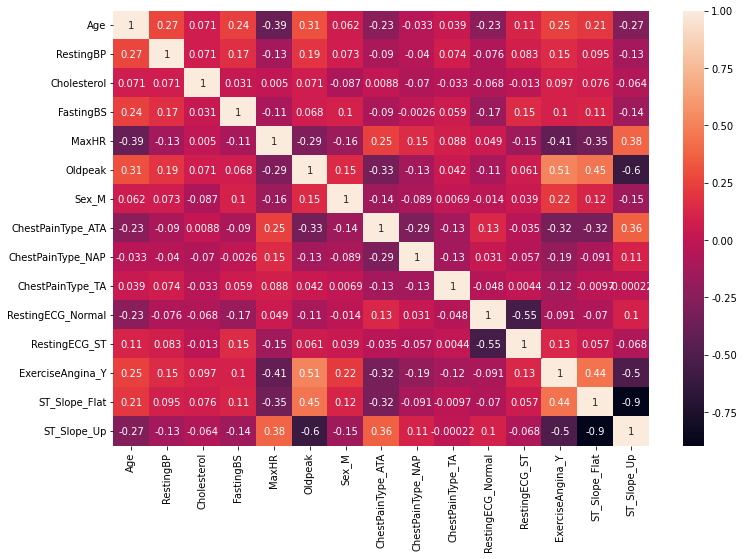

In [31]:
plt.figure(figsize=(12,8))

#plot heat map
sns.heatmap(x.corr(), annot=True)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42, stratify=y)

## **9. 모델 학습하기**

In [33]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.

from sklearn.metrics import classification_report
import time

def get_model_train_eval(model, x_train, x_test, y_train, y_test):
    print('model :', model)
    # 시작 시간 측정
    start = time.time() 

    # 모델
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    pred_proba = model.predict_proba(x_test)[:, 1]
    
    # confusion matrix
    print(pd.crosstab(y_test, pred, rownames=['pred'], colnames=['real'])) 
    
    # classification report
    print(classification_report(y_test, pred)) 
    
    # AUC 산출 (Positive Label = 1)
    auc = roc_auc_score(y_test, pred_proba)

    #ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.plot( [0,1], [0,1], '--' )
    plt.title( 'ROC curve' )
    plt.legend( labels = ['AUC = %.4f' % auc], loc = 'lower right' )
    plt.show()

    # 끝 시간 측정
    end = time.time() 

    # 끝-시작 시간 print
    print('시간 :',end-start,'sec') 

model : SVC(probability=True)
real   0   1
pred        
0     88  25
1     17  84
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       113
           1       0.77      0.83      0.80       101

    accuracy                           0.80       214
   macro avg       0.80      0.81      0.80       214
weighted avg       0.81      0.80      0.80       214



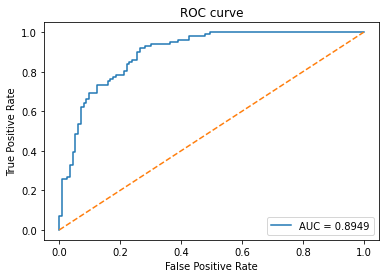

시간 : 0.2642629146575928 sec
-----------------------------------------------------
model : AdaBoostClassifier()
real   0   1
pred        
0     94  19
1     21  80
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       113
           1       0.81      0.79      0.80       101

    accuracy                           0.81       214
   macro avg       0.81      0.81      0.81       214
weighted avg       0.81      0.81      0.81       214



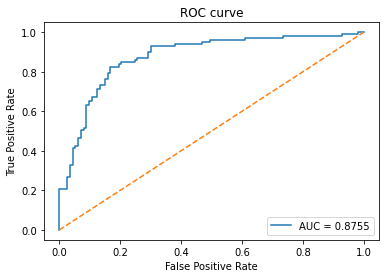

시간 : 0.2950451374053955 sec
-----------------------------------------------------
model : XGBClassifier()
real   0   1
pred        
0     96  17
1     17  84
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       113
           1       0.83      0.83      0.83       101

    accuracy                           0.84       214
   macro avg       0.84      0.84      0.84       214
weighted avg       0.84      0.84      0.84       214



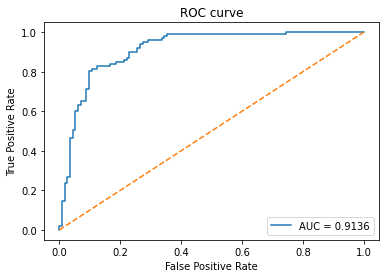

시간 : 0.33965277671813965 sec
-----------------------------------------------------
model : LGBMClassifier()
real   0   1
pred        
0     95  18
1     15  86
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       113
           1       0.83      0.85      0.84       101

    accuracy                           0.85       214
   macro avg       0.85      0.85      0.85       214
weighted avg       0.85      0.85      0.85       214



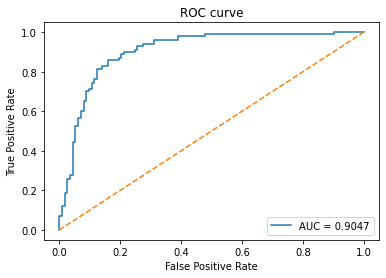

시간 : 0.26464319229125977 sec
-----------------------------------------------------
model : DecisionTreeClassifier()
real   0   1
pred        
0     85  28
1     25  76
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       113
           1       0.73      0.75      0.74       101

    accuracy                           0.75       214
   macro avg       0.75      0.75      0.75       214
weighted avg       0.75      0.75      0.75       214



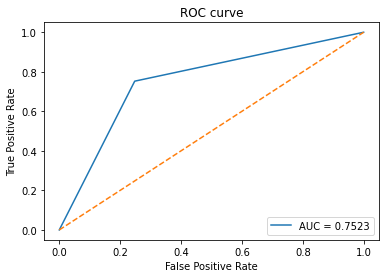

시간 : 0.20874691009521484 sec
-----------------------------------------------------
model : RandomForestClassifier()
real   0   1
pred        
0     93  20
1     16  85
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       113
           1       0.81      0.84      0.83       101

    accuracy                           0.83       214
   macro avg       0.83      0.83      0.83       214
weighted avg       0.83      0.83      0.83       214



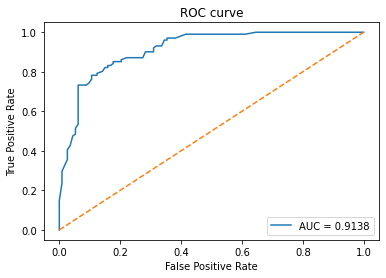

시간 : 0.40297412872314453 sec
-----------------------------------------------------


In [34]:
# 모델 한꺼번에 돌리기

svc = SVC(probability=True)
adaboost = AdaBoostClassifier()
xgboost = XGBClassifier()
lightgbm = LGBMClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()

models = [svc, adaboost, xgboost, lightgbm, decisiontree, randomforest]

for i, model in enumerate(models):
#    print(model)
    get_model_train_eval(model, x_train, x_test, y_train, y_test)
    print('-----------------------------------------------------')

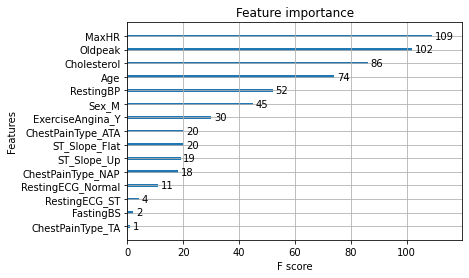

In [35]:
plot_importance(xgboost)
plt.show()

In [36]:
xgb_param_grid ={
    'max_depth' : [3,4,5,6] , 
    'n_estimators': [10, 50, 100, 200], 
    'learning_rate':[0.01, 0.05, 0.1], 
    'gamma': [0.5, 1, 2]
}

In [37]:
from sklearn.model_selection import GridSearchCV, KFold

rf = RandomForestClassifier()
kf = KFold(random_state = 0,
          n_splits = 10,
          shuffle = True)

xgb_grid_search = GridSearchCV(xgboost, xgb_param_grid, cv = kf, n_jobs = -1, verbose = 2)

In [38]:
xgb_grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': [0.5, 1, 2],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

In [39]:
xgb_grid_search.best_params_

{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

model : XGBClassifier(gamma=0.5, learning_rate=0.05, max_depth=4)
real   0   1
pred        
0     97  16
1     16  85
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       113
           1       0.84      0.84      0.84       101

    accuracy                           0.85       214
   macro avg       0.85      0.85      0.85       214
weighted avg       0.85      0.85      0.85       214



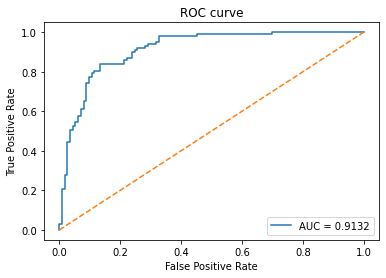

시간 : 0.2689015865325928 sec


In [40]:
xgboost = XGBClassifier(gamma = 0.5, learning_rate = 0.05, max_depth = 4, n_estimators = 100)
get_model_train_eval(xgboost, x_train, x_test, y_train, y_test)